<a href="https://colab.research.google.com/github/vi-dentata/spaceaero-2022/blob/main/Kuznetsova_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
"""
Введём систему отсчёта с началом отсчёта в центра земли. Ось X направим 
перпендикулярно экватору, ось Y сонаправлена с экватором
"""

Day = 86400
M_earth = 5.9726e24    
R_earth = 6.378100e6   
G = 6.67e-11        
k = 0.05
Rgso = 3.5785e7
#fuel exhaust velocity
mu1 = 300
mu2 = 200
mu3 = 50   
#fuel mass flow
u1  = 4000
u2  = 3000
u3  = 700 #импульса при данной в условии скорости было недостаточно для выхода
           #на геостациоанрную орбиту, поэтому было принято решение увеличить её
#stage mass
m1  = 80000
m2  = 30000
m3  = 2000 
#payload
pl1 = 30000
pl2 = 2000
pl3 = 5    
#tank mass
mt1 = k * m1
mt2 = k * m2
mt3 = k * m3
#fuel mass
mf1 = m1 - pl1 - mt1
mf2 = m2 - pl2 - mt2
mf3 = m3 - pl3 - mt3

In [3]:
S = 2 
Cx = 0.4

def rho(r):
  rho0 = 1.2 
  h0 = 9000 
  if r - R_earth <= 10*h0:
    return rho0*np.exp(-(r - R_earth)/h0)
  else:
    return 0


def g(r):
  return G * M_earth / r**2

1 ступень отработана
Cкорость 1949.2938702985298 м/с
Высота 107.2890018976545 км
Время полёта 00:02:33


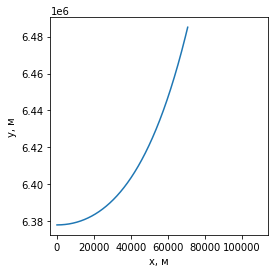

2 ступень отрабтотана
Cкорость 7434.3901342706295 м/с
Высота 482.3722065188559 км
Время полёта 00:04:45


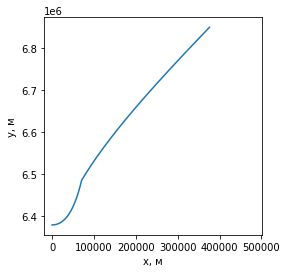

1 включение 3 ступени
Cкорость 9803.41284428404 м/с
Высота 716.8897311769957 км
Время полёта 00:05:24


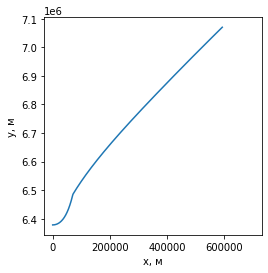

Полёт до апоцентра
Cкорость 1643.3347387211384 м/с
Высота 35799.08912773292 км
Время полёта 05:23:12


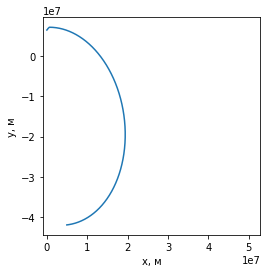

3 ступень отработана
Cкорость 3068.9127341229605 м/с
Высота 35799.08903471524 км
Время полёта 05:23:13


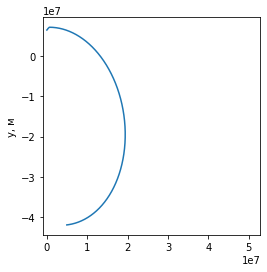

Пролёт по орбите
Cкорость 3073.94080305216 м/с
Высота 35786.02750904761 км
Время полёта 11:20:00


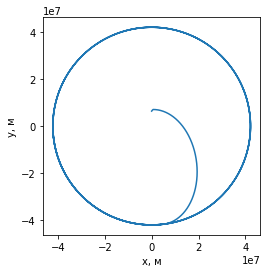

In [4]:
"""
Введём систему отсчёта с началом отсчёта в центра земли. Ось X направим 
перпендикулярно экватору, ось Y сонаправлена с экватором
"""

Day = 86400
M_earth = 5.9726e24    
R_earth = 6.378100e6   
G = 6.67e-11        
k = 0.05
Rgso = 3.5785e7
#fuel exhaust velocity
mu1 = 300
mu2 = 200
mu3 = 50   
#fuel mass flow
u1  = 4000
u2  = 3000
u3  = 750 #импульса при данной в условии скорости было недостаточно для выхода
           #на геостациоанрную орбиту, поэтому было принято решение увеличить её
#stage mass
m1  = 80000
m2  = 30000
m3  = 2000 
#payload
pl1 = 30000
pl2 = 2000
pl3 = 5    
#tank mass
mt1 = k * m1
mt2 = k * m2
mt3 = k * m3
#fuel mass
mf1 = m1 - pl1 - mt1
mf2 = m2 - pl2 - mt2
mf3 = m3 - pl3 - mt3


x = [1e-10]
y = [R_earth]
vx = [2 * np.pi * R_earth / Day] # старт производится с экватора, в силу того что в
                            # таком случае добавка к скорости ракеты(скорость 
                            # вращения Земли) будет максимальна
vy = [0]
dt = 0.01
t = 0
m = m1
r_rocket_earth = []
tim = []
"""
1 этап полёта. Взлёт строго вверх. 
"""
while mf1 > 0:
  r = np.sqrt(x[-1] ** 2 + y[-1]**2)
  v = np.sqrt(vx[-1] ** 2 + vy[-1] ** 2)
  beta = np.arctan(y[-1] / x[-1])
  gamma = np.arctan(vy[-1] / vx[-1])
  ax = ( - m * g(r) * np.cos(beta)) / m #Будем учитывать только силу тяжести по этой оси
  ay = (-rho(r) * v ** 2 / 2 * Cx * S * np.sin(gamma) - m * g(r) * np.sin(beta) + mu1 * u1) / m
  vx.append(vx[-1] + ax * dt)
  vy.append(vy[-1] + ay * dt)
  x.append(x[-1] + vx[-1] * dt)
  y.append(y[-1] + vy[-1] * dt)
  t += dt
  m -= mu1 * dt
  mf1 -= mu1* dt
  r_rocket_earth.append(r)
  tim.append(t)
print("1 ступень отработана")
print("Cкорость", v, "м/с")
print("Высота", (r - R_earth) / 1000, 'км')
print('Время полёта', time.strftime("%H:%M:%S",time.gmtime(t)))

plt.xlabel("x, м")
plt.ylabel("y, м")
plt.plot(x, y)
plt.axis('square')
plt.show()

"""
2 этап полёта. Поворот ракеты на угол α. Отработка 2 ступени
"""
alpha = 59 * np.pi / 180
vx.append(v * np.cos(alpha))
vy.append(v * np.sin(alpha))
x.append(x[-1])
y.append(y[-1])
m = m2
while mf2 > 0:
  r = np.sqrt(x[-1] ** 2 + y[-1]**2)
  v = np.sqrt(vx[-1] ** 2 + vy[-1] ** 2)
  beta = np.arctan(y[-1] / x[-1])
  gamma = np.arctan(vy[-1] / vx[-1])
  ax = ( - m * g(r) * np.cos(beta) + mu2 * u2 * np.cos(gamma)) / m
  ay = ( - m * g(r) * np.sin(beta) + mu2 * u2 * np.sin(gamma)) / m
  vx.append(vx[-1] + ax * dt)
  vy.append(vy[-1] + ay * dt)
  x.append(x[-1] + vx[-1] * dt)
  y.append(y[-1] + vy[-1] * dt)
  t += dt
  m -= mu2 * dt
  mf2 -= mu2* dt
  r_rocket_earth.append(r)
  tim.append(t)

print("2 ступень отрабтотана")
print("Cкорость", v, "м/с")
print("Высота", (r - R_earth) / 1000, 'км')
print('Время полёта', time.strftime("%H:%M:%S",time.gmtime(t)))

plt.xlabel("x, м")
plt.ylabel("y, м")
plt.plot(x, y)
plt.axis('square')
plt.show()

"""
3 этап полёта. Включим двигатели 3 ступени, на такое время, что полученная скорость
была равна скорости в перицентре орбиты, апоцентр которой удален на радиус
геостационарной орбиты 
"""
v_new = np.sqrt(G * M_earth * (2 / r - 1 / ((r + Rgso + R_earth)/ 2)))
m = m3
tao = 0
dt = 0.001 #При включении двигателей 3 ступени требовалась более точная настройка
           #для достижения требуемой скорости.
           #Подбиралось время работы ступени
while tao < 38.766:
  r = np.sqrt(x[-1] ** 2 + y[-1]**2)
  v = np.sqrt(vx[-1] ** 2 + vy[-1] ** 2)
  beta = np.arctan(y[-1] / x[-1])
  gamma = np.arctan(vy[-1] / vx[-1])
  ax = ( - m * g(r) * np.cos(beta) + mu3 * u3 * np.cos(gamma)) / m
  ay = ( - m * g(r) * np.sin(beta) + mu3 * u3 * np.sin(gamma)) / m
  vx.append(vx[-1] + ax * dt)
  vy.append(vy[-1] + ay * dt)
  x.append(x[-1] + vx[-1] * dt)
  y.append(y[-1] + vy[-1] * dt)
  t += dt
  m -= mu3 * dt
  mf3 -= mu3* dt
  r_rocket_earth.append(r)
  tim.append(t)
  tao+= dt
print("1 включение 3 ступени")
print("Cкорость", v, "м/с")
print("Высота", (r - R_earth) / 1000, 'км')
print('Время полёта', time.strftime("%H:%M:%S",time.gmtime(t)))

plt.xlabel("x, м")
plt.ylabel("y, м")
plt.plot(x, y)
plt.axis('square')
plt.show()

"""
4 этап полёта. Долетим до апоцентра полученной орбиты
"""
dt = 0.01
vx.append(v)
vy.append(0)
x.append(x[-1])
y.append(y[-1])
pr = 0
while pr < np.sqrt(x[-1] ** 2 + y[-1]**2):
  r = np.sqrt(x[-1] ** 2 + y[-1]**2)
  v = np.sqrt(vx[-1] ** 2 + vy[-1] ** 2)
  beta = np.arctan(y[-1] / x[-1])
  ax = ( - m * g(r) * np.cos(beta)) / m
  ay = ( - m * g(r) * np.sin(beta)) / m
  vx.append(vx[-1] + ax * dt)
  vy.append(vy[-1] + ay * dt)
  x.append(x[-1] + vx[-1] * dt)
  y.append(y[-1] + vy[-1] * dt)
  t += dt
  pr = r
  r_rocket_earth.append(r)
  tim.append(t)  
print("Полёт до апоцентра")
print("Cкорость", v, "м/с")
print("Высота", (r - R_earth) / 1000, 'км')
print('Время полёта', time.strftime("%H:%M:%S",time.gmtime(t)))


plt.xlabel("x, м")
plt.ylabel("y, м")
plt.plot(x, y)
plt.axis('square')
plt.show()
"""
5 этап полёта. Повторное включение двигателей 3 ступени, с целью выхода на 
круговую орбиту
"""
v_new =  np.sqrt(G * M_earth * (2 / r - 1 / ((r + Rgso + R_earth)/ 2)))
tao = 0
dt = 0.001
while tao < 1.050:
  r = np.sqrt(x[-1] ** 2 + y[-1]**2)
  v = np.sqrt(vx[-1] ** 2 + vy[-1] ** 2)
  beta = np.arctan(y[-1] / x[-1])
  gamma = np.arctan(vy[-1] / vx[-1])
  ax = ( - m * g(r) * np.cos(beta) - mu3 * u3 * np.cos(gamma)) / m
  ay = ( - m * g(r) * np.sin(beta) - mu3 * u3 * np.sin(gamma)) / m
  vx.append(vx[-1] + ax * dt)
  vy.append(vy[-1] + ay * dt)
  x.append(x[-1] + vx[-1] * dt)
  y.append(y[-1] + vy[-1] * dt)
  t += dt
  m -= mu3 * dt
  mf3 -= mu3* dt
  r_rocket_earth.append(r)
  tim.append(t)  
  tao += dt

print("3 ступень отработана")
print("Cкорость", v, "м/с")
print("Высота", (r - R_earth) / 1000, 'км')
print('Время полёта', time.strftime("%H:%M:%S",time.gmtime(t)))

plt.ylabel("y, м")
plt.plot(x, y)
plt.axis('square')
plt.show()

"""
6 этап полёта. Пролёт по полученной орбите
"""
dt = 1
while t<300000:
  r = np.sqrt(x[-1] ** 2 + y[-1]**2)
  v = np.sqrt(vx[-1] ** 2 + vy[-1] ** 2)
  beta = np.arctan(abs(y[-1] / x[-1]))
  if(x[-1] < 0):
   ax = ( m * g(r) * np.cos(beta)) / m
  else:
    ax = ( -m * g(r) * np.cos(beta)) / m
  if(y[-1] < 0):
    ay = ( m * g(r) * np.sin(beta)) / m
  else:
    ay = (- m * g(r) * np.sin(beta)) / m
  vx.append(vx[-1] + ax * dt)
  vy.append(vy[-1] + ay * dt)
  x.append(x[-1] + vx[-1] * dt)
  y.append(y[-1] + vy[-1] * dt)
  t += dt
  r_rocket_earth.append(r)
  tim.append(t)
print("Пролёт по орбите")
print("Cкорость", v, "м/с")
print("Высота", (r - R_earth) / 1000, 'км')
print('Время полёта', time.strftime("%H:%M:%S",time.gmtime(t)))

plt.xlabel("x, м")
plt.ylabel("y, м")
plt.plot(x, y)
plt.axis('square')
plt.show()

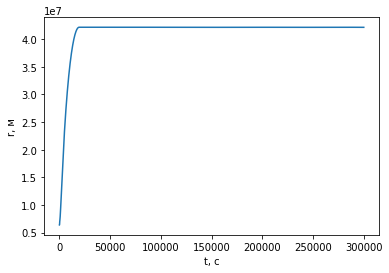

In [5]:
#Из графика расстояния до центра Земли видно, что нам удалось выйти на круговую орбиту
plt.xlabel("t, с")
plt.ylabel("r, м")
plt.plot(tim, r_rocket_earth)

plt.show()